![](figuras/logo.png)

<center>
    <h1>Proyecto Inteligencia Artificial</h1>
    <h4>Jesus Perez CI: 25151076</h4>
    <h4>Jenny Remolina CI: 20434745</h4>
    <h5>Marzo, 2020.</h5>
</center>

## Agenda

- Introducción
- Descripción de datos
- Exploración de datos
- Preparación de datos
- Entrenamiento y evaluación del modelo de aprendizaje automático
- Interpretando el modelo de aprendizaje automático
- Guardar el modelo
- Hacer predicciones con el modelo

## Introducción

Usaremos Aprendizaje Automático para predecir si una reserva de hotel fue cancelada, a partir de un conjunto de datos que contiene información de reserva para un hotel urbano y un hotel turístico e incluye información de cuándo se realizó la reserva, la duración de la estadía, la cantidad de adultos, niños y / ó bebés, y la cantidad de espacios de estacionamiento disponibles, entre otras cosas.

Los datos fueron recopilados y puestos a disposición de el artículo Conjuntos de datos de demanda de reserva de hotel, escritos por Nuno Antonio, Ana Almeida y Luis Nunes para Data in Brief, Volumen 22, febrero de 2019.

Thomas Mock y Antoine Bichat descargaron y limpiaron los datos para #TidyTuesday durante la semana del 11 de febrero de 2020.

(https://www.kaggle.com/jessemostipak/hotel-booking-demand)

## Descripción de los Datos

Tenemos nuestros datos guardados en un archivo CSV llamado
`hotel_bookings.csv`. Primero leemos nuestro conjunto de datos a
un _dataframe_ de `pandas` llamado `reserva`, y luego usamos
la función `head()` para mostrar los primeros cinco registros
de nuestro conjunto de datos.

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr

In [2]:
reserva = pd.read_csv('datos/hotel_bookings.csv')
reserva.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


Asegurando de que nuestros datos estén limpios (no tiene valores nulos, etc.).

In [3]:
reserva.shape

(119390, 32)

In [4]:
reserva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
reserva.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_year,119390,NaN,NaN,NaN,2016.16,0.707476,2015,2016,2016,2017,2017
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
arrival_date_day_of_month,119390,NaN,NaN,NaN,15.7982,8.78083,1,8,16,23,31
stays_in_weekend_nights,119390,NaN,NaN,NaN,0.927599,0.998613,0,0,1,2,19
stays_in_week_nights,119390,NaN,NaN,NaN,2.5003,1.90829,0,1,2,3,50
adults,119390,NaN,NaN,NaN,1.8564,0.579261,0,2,2,2,55


- **hotel**: Hotel (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled**: Indica si la reservación fue cancelada (1) o no (0)
- **lead_time**: Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada. 
- **arrival_date_year**: Año de la fecha de llegada
- **arrival_date_month**: Mes de la fecha de llegada
- **arrival_date_week_number**: Número de la semana del año de la fecha de llegada
- **arrival_date_day_of_month**: Día de la fecha de llegada
- **stays_in_weekend_nights**: Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó para quedarse en el hotel.
- **stays_in_week_nights**: Número de noches semanales (de lunes a viernes) que el huésped se hospedó o reservó para quedarse en el hotel
- **adults**: Número de adultos
- **children**: Número de niños
- **babies**: Número de bebés
- **meal**: Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: Indefinido / SC - sin paquete de comida; BB - Alojamiento y desayuno; HB - Media pensión (desayuno y otra comida, generalmente cena); FB - Pensión completa (desayuno, almuerzo y cena)
- **country**: País de origen. Las categorías se representan en el formato ISO
- **market_segment**: Designación de segmento de mercado. En categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"
- **distribution_channel**: Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"
- **is_repeated_guest**: Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)
- **previous_cancellations**: Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual
- **previous_bookings_not_canceled**: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
- **reserved_room_type**: Código del tipo de habitación reservado. El código se presenta en lugar de la designación por razones de anonimato.
- **assigned_room_type**: Código para el tipo de habitación asignada a la reserva. A veces, el tipo de habitación asignada difiere del tipo de habitación reservada debido a razones de operación del hotel (por ejemplo, sobreventa) o por solicitud del cliente. El código se presenta en lugar de la designación por razones de anonimato.
- **booking_changes**: Número de cambios / modificaciones realizados en la reserva desde el momento en que la reserva se ingresó en el PMS hasta el momento del check-in o cancelación
- **deposit_type**: Indica si el cliente realizó un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: Sin depósito: no se realizó ningún depósito; Sin reembolso: se realizó un depósito por el valor del costo total de la estadía; Reembolsable: se realizó un depósito con un valor por debajo del costo total de la estadía.
- **agent**: Identificación de la agencia de viajes que realizó la reserva.
- **company**: Identificación de la empresa / entidad que realizó la reserva o responsable de pagar la reserva. Se presenta la identificación en lugar de la designación por razones de anonimato
- **days_in_waiting_list**: Número de días que la reserva estuvo en la lista de espera antes de que se confirmara al cliente.
- **customer_type**: Tipo de reserva, asumiendo una de cuatro categorías: 
    - Contract/Contrato: cuando la reserva tiene una asignación u otro tipo de contrato asociado; 
    - Grup/Grupo: cuando la reserva está asociada a un grupo; 
    - Transient/Transitoria: cuando la reserva no forma parte de un grupo o contrato y no está asociada a otra reserva transitoria; 
    - Transient-party/Parte-transitoria: cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria
- **adr**: Tarifa diaria promedio tal como se define dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estadía
- **required_car_parking_spaces**: Número de plazas de aparcamiento requeridas por el cliente.
- **total_of_special_requests**: Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)
- **reservation_status**: Último estado de la reserva, asumiendo una de tres categorías: 
    - Canceled/Cancelada: la reserva fue cancelada por el cliente; 
    - Check-out/Salida: el cliente se ha registrado pero ya se fue; 
    - No-Show: el cliente no se registró e informó al hotel del motivo.
- **reservation_status_date**: Fecha en la que se estableció el último estado. Esta variable se puede usar junto con el Estado de reserva para comprender cuándo se canceló la reserva o cuándo el cliente realizó el check-out del hotel.

## Procesamiento de Datos

Ya que analizamos los datos y sabemos qué tenemos exactamente y qué debemos corregir, procedemos a realizar el preprocesamiento de datos.

### - Verificando valores nan en los atributos

In [6]:
pd.isnull(reserva).sum() > 0

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


### - Reemplazando los datos faltantes por la media

* Country attribute

In [7]:
reserva.country.isnull().sum()

488

In [8]:
reserva.country.describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [9]:
top = 'PRT'

In [10]:
#Reemplazo los datos faltantes en country por la media de esta columna
reserva['country'] = reserva['country'].replace(np.nan, top)

* Agent attribute

In [11]:
reserva.agent.isnull().sum()

16340

In [12]:
reserva.agent.isnull().head(5)

0     True
1     True
2     True
3    False
4    False
Name: agent, dtype: bool

In [13]:
reserva.agent.describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [14]:
#Reemplazo los datos faltantes en agent por la media de esta columna
promedio = reserva["agent"].mean()
promedio

86.693381853469191

In [15]:
reserva['agent'] = reserva['agent'].replace(np.nan, promedio)

### - Eliminando valores nan

* Company attribute

In [16]:
reserva.company.isnull().sum()

112593

Company tiene la mayoria de sus valores nulos por lo que no tiene sentido complementar esos datos. En este sentido, company sera eliminado como atributo del dataframe

In [17]:
reserva = reserva.drop('company', 1);

* Children atribut

In [18]:
reserva["children"].mean()

0.10388990333874994

In [19]:
reserva.children.isnull().sum()

4

Children tiene 4 valores nulos, por lo que se eliminaran esas filas del dataframe

In [20]:
reserva = reserva.dropna()

### - Eliminando atributos que aportan poca informacion

* arrival_date_year atribut

In [21]:
reserva = reserva.drop('arrival_date_year', 1)

* reservation_status attribute
* reservation_status_date attribute

In [22]:
reserva = reserva.drop('reservation_status', 1)
reserva = reserva.drop('reservation_status_date',1)

### - Verificando que los atributos no contengan valores nan

In [23]:
pd.isnull(reserva).sum() > 0

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
days_in_waiting_list              False
customer_type                     False


### - Vista de los datos unicos
En este paso observamos los datos unicos de cada atributo para su posterior cambio de object a float64/int64

In [24]:
# Vista de los datos únicos 
reserva.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI',
       'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND',
       'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA',
       'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL',
       'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM',
       'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 

In [25]:
# Cambio los datos de hotel en números
reserva['hotel'].replace(['City Hotel','Resort Hotel'],[0,1],inplace=True)

# Cambio los datos de arrival_date_month en números
reserva['arrival_date_month'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

# Cambio los datos de meal en números
reserva['meal'].replace(['BB', 'FB', 'HB', 'SC', 'Undefined'],[0,1,2,3,4],inplace=True)

# reserva['reservation_status_month'] = pd.to_datetime(reserva["reservation_status_date"]).dt.strftime("%m")
# reserva['reservation_status_day'] = pd.to_datetime(reserva["reservation_status_date"]).dt.strftime("%d")

# Cambio el tipo de dato de date de object a int
#reserva['reservation_status_date'] = pd.to_datetime(reserva["reservation_status_date"]).dt.strftime("%Y%m%d")
#reserva["reservation_status_date"] = reserva['reservation_status_date'].astype('int')

# Cambio los datos de reservation_status en números
#reserva['reservation_status'].replace(['Canceled','Check-Out','No-Show'],[0,1,2],inplace=True)

# Cambio los datos de customer_type en números
reserva['customer_type'].replace(['Transient', 'Contract', 'Transient-Party', 'Group'],[0,1,2,3],inplace=True)

# Cambio los datos de deposit_type en números
reserva['deposit_type'].replace(['No Deposit', 'Refundable', 'Non Refund'],[0,1,2],inplace=True)

# Cambio los datos de reserved_room_type en números
reserva['reserved_room_type'].replace(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

# Cambio los datos de assigned_room_type en números
reserva['assigned_room_type'].replace(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

# Cambio los datos de market_segment en números
reserva['market_segment'].replace(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation'],[0,1,2,3,4,5,6,7],inplace=True)

# Cambio los datos de distribution_channel en números
reserva['distribution_channel'].replace(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'],[0,1,2,3,4],inplace=True)

# Cambio los datos de country en números
reserva['country'].replace(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI',
       'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND',
       'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA',
       'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL',
       'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM',
       'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK',
       'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', 'TMP', 'GLP', 'KEN',
       'LIE', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN', 'BFA',
       'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB', 'ABW', 'AIA', 'SLV',
       'DMA', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM', 'MRT', 'NCL',
       'KIR', 'SDN', 'ATF', 'SLE', 'LAO'],[0,1,2,3,4,5,6,0,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175],inplace=True)

Observamos los cambios de tipo de datos de los atributos:

In [26]:
reserva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 28 columns):
hotel                             119386 non-null int64
is_canceled                       119386 non-null int64
lead_time                         119386 non-null int64
arrival_date_month                119386 non-null int64
arrival_date_week_number          119386 non-null int64
arrival_date_day_of_month         119386 non-null int64
stays_in_weekend_nights           119386 non-null int64
stays_in_week_nights              119386 non-null int64
adults                            119386 non-null int64
children                          119386 non-null float64
babies                            119386 non-null int64
meal                              119386 non-null int64
country                           119386 non-null int64
market_segment                    119386 non-null int64
distribution_channel              119386 non-null int64
is_repeated_guest                 119386 non-nu

## Exploración de datos

Exploremos ahora nuestro conjunto de datos para tener una idea de cómo se ve y obtener algunas ideas al respecto.

Comencemos por encontrar la correlación de cada par de atributos (y la variable de resultado), y visualicemos las correlaciones usando un mapa de calor.

In [27]:
corr = reserva.corr()
corr

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,-0.136505,-0.075405,-0.001805,-0.001261,0.001836,0.186595,0.234022,0.013199,0.044205,...,0.123838,0.146240,0.072813,-0.169504,0.718520,-0.072436,-0.012659,-0.096758,0.218869,0.043411
is_canceled,-0.136505,1.000000,0.293177,0.011002,0.008132,-0.006084,-0.001783,0.024771,0.059990,0.005048,...,-0.044285,-0.125410,-0.144371,0.480465,-0.077978,0.054193,-0.135911,0.047622,-0.195492,-0.234706
lead_time,-0.075405,0.293177,1.000000,0.131441,0.126885,0.002234,0.085667,0.165799,0.119544,-0.037622,...,-0.068906,-0.118565,0.000138,0.380799,-0.065296,0.170083,0.162593,-0.063126,-0.116461,-0.095688
arrival_date_month,-0.001805,0.011002,0.131441,1.000000,0.995105,-0.026047,0.018443,0.019214,0.028524,0.005441,...,-0.000397,0.005962,0.004814,0.007594,-0.027718,0.019047,0.063355,0.079341,0.000261,0.028013
arrival_date_week_number,-0.001261,0.008132,0.126885,0.995105,1.000000,0.066824,0.018209,0.015559,0.025901,0.005518,...,0.000633,0.007396,0.005512,0.006823,-0.028301,0.022935,0.063656,0.075811,0.001924,0.026139
arrival_date_day_of_month,0.001836,-0.006084,0.002234,-0.026047,0.066824,1.000000,-0.016370,-0.028192,-0.001539,0.014544,...,0.017011,0.012079,0.010601,-0.006817,0.001375,0.022723,0.003180,0.030189,0.008675,0.003094
stays_in_weekend_nights,0.186595,-0.001783,0.085667,0.018443,0.018209,-0.016370,1.000000,0.498967,0.091889,0.045793,...,0.088737,0.039961,0.063280,-0.114088,0.131454,-0.054153,-0.042917,0.049323,-0.018556,0.072686
stays_in_week_nights,0.234022,0.024771,0.165799,0.019214,0.015559,-0.028192,0.498967,1.000000,0.092983,0.044203,...,0.099540,0.043536,0.096210,-0.079556,0.169228,-0.002020,-0.037798,0.065219,-0.024861,0.068199
adults,0.013199,0.059990,0.119544,0.028524,0.025901,-0.001539,0.091889,0.092983,1.000000,0.030447,...,0.106685,0.063222,-0.051666,-0.028766,-0.028030,-0.008280,-0.093803,0.230690,0.014791,0.122855
children,0.044205,0.005048,-0.037622,0.005441,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,...,0.395340,0.315290,0.048949,-0.096973,0.039422,-0.033273,-0.096125,0.324854,0.056253,0.081745


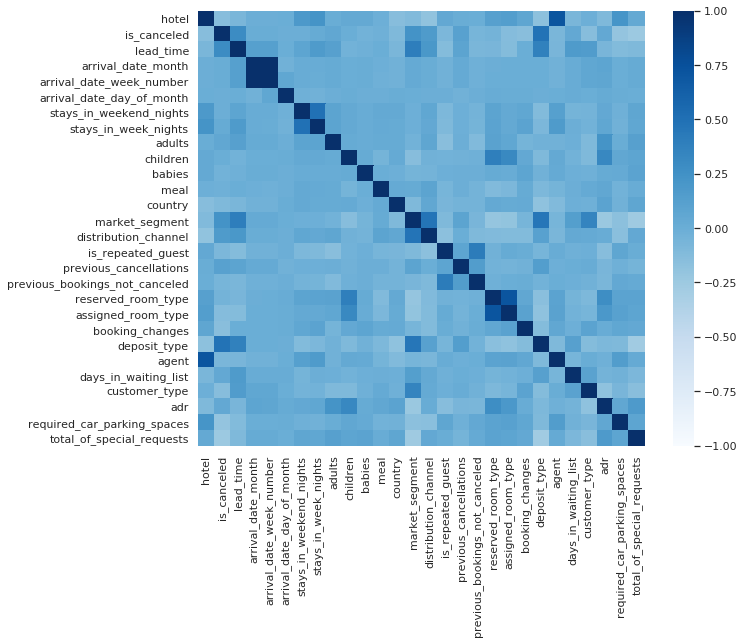

In [28]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', vmin=-1, vmax=1);

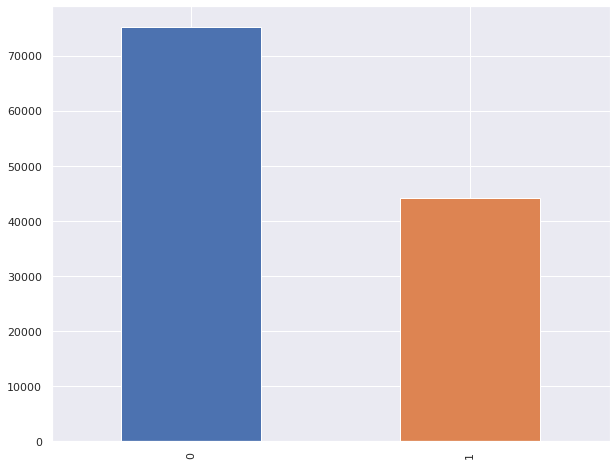

In [29]:
reserva.is_canceled.value_counts().plot.bar()

Observamos la correlación de ciertos atributos individuales respecto a el atributo de interes para nuestro objetivo propuesto "is_canceled".

Y notamos como los atributos days_in_waiting_list, lead_time, previous_cancellation y deposit_type aunmentan el hecho de que haya mas posibilidades de cancelar una reserva.

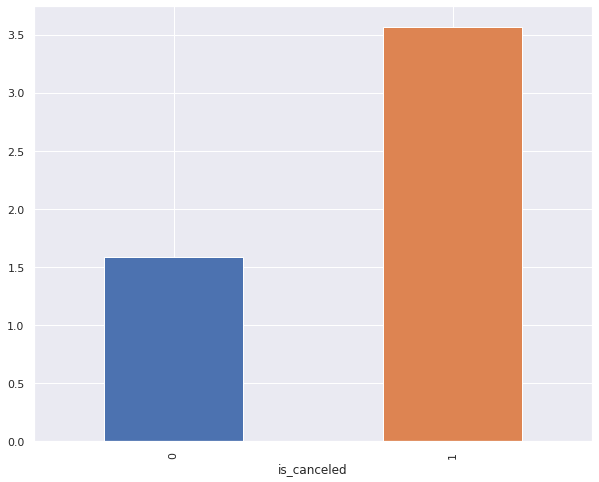

In [30]:
reserva.groupby("is_canceled")["days_in_waiting_list"].mean().plot.bar()

La correlación de el atributo de interes para nuestro objetivo propuesto "is_canceled" con los atributos arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, meal, distribution_channel, reserved_room_type, assigned_room_type, agent, company, adr, market_segment y reservation_status_date; proporcionan información de incertidumbre.

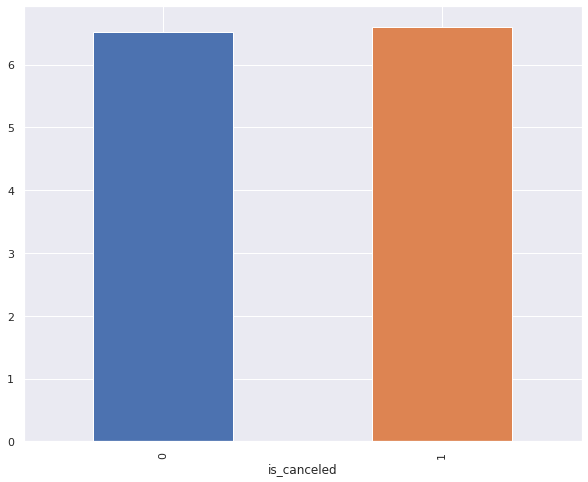

In [31]:
reserva.groupby("is_canceled")["arrival_date_month"].mean().plot.bar()

Mientras que la correlación de el atributo de interes para nuestro objetivo propuesto "is_canceled" con los atributos required_car_parking_spaces, babies, country, is_repeated_guest, previous_bookings_not_canceled, booking_changes, customer_type, total_of_special_requests y reservation_status; proporcionan información de la disminución de nuestro objetivo.

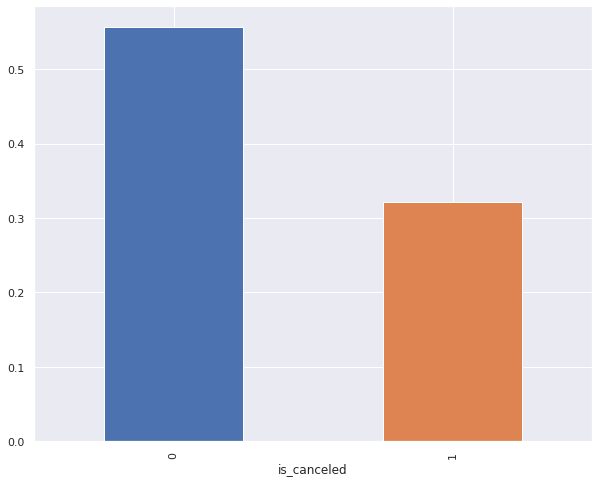

In [32]:
reserva.groupby("is_canceled")["customer_type"].mean().plot.bar()

## Preparación del Conjunto de Datos

Al usar algoritmos de aprendizaje automático, siempre debemos dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba. Usaremos la función `train_test_split` de sklearn para dividir el conjunto de datos. Dividiremos el conjunto datos en 80% para el conjunto de entrenamiento y 20% para el conjunto de prueba.

In [33]:
from sklearn.model_selection import train_test_split
salidaParaModelo = reserva.is_canceled

atributosParaModelo = reserva.drop('is_canceled', 1)

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(atributosParaModelo, salidaParaModelo, 
                                                                        test_size = 0.1, 
                                                                        random_state=42)

X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(X_entrenamiento, y_entrenamiento, 
                                                                        test_size = 0.2, 
                                                                        random_state=43)

print(X_entrenamiento.shape,y_entrenamiento.shape)
print(X_validacion.shape, y_validacion.shape)
print(X_prueba.shape, y_prueba.shape)
X_entrenamiento.head().T

(85957, 27) (85957,)
(21490, 27) (21490,)
(11939, 27) (11939,)


,1297,98202,116635,62752,64200
hotel,1.0,0.0,0.0,0.00,0.000000
lead_time,23.0,39.0,186.0,305.00,28.000000
arrival_date_month,8.0,9.0,7.0,1.00,3.000000
arrival_date_week_number,35.0,40.0,29.0,3.00,9.000000
arrival_date_day_of_month,23.0,25.0,22.0,21.00,2.000000
stays_in_weekend_nights,2.0,1.0,0.0,2.00,0.000000
stays_in_week_nights,2.0,0.0,1.0,2.00,3.000000
adults,2.0,1.0,2.0,2.00,2.000000
children,0.0,0.0,1.0,0.00,0.000000
babies,0.0,0.0,0.0,0.00,0.000000


Como paso final antes de usar el aprendizaje automático, normalizaremos nuestras entradas. Los modelos de Aprendizaje Automático a menudo se benefician sustancialmente de la normalización de las entradas. También nos facilita la comprensión de la importancia de cada atributo más adelante, cuando observemos los pesos del modelo. Normalizaremos los datos de modo que cada atributo tenga media 0 y desviación estándar de 1.

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_entrenamiento)
X_entrenamiento = sc.transform(X_entrenamiento)
X_validacion = sc.transform(X_validacion)
X_prueba = sc.transform(X_prueba)

## Entrenamiento y Evaluación del Modelo de Aprendizaje Automático

Ahora podemos entrenar nuestro modelo de clasificación. Usaremos un modelo de aprendizaje automático simple llamado regresión logística. Dado que el modelo está disponible en `sklearn`. Primero, creamos una instancia llamada `Modelo_Reserva` y luego usamos la función `fit` para entrenar el modelo.

### - Primera iteracion

In [35]:
Modelo_Reserva = LogisticRegression()
Modelo_Reserva.fit(X_entrenamiento, y_entrenamiento)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

A continuación, utilizaremos nuestros datos de prueba para conocer la exactitud del modelo.

In [36]:
exactitud = Modelo_Reserva.score(X_validacion, y_validacion)
print("exactitud = ", exactitud * 100, "%")

exactitud =  79.3671475105 %


### - Segunda iteracion

In [37]:
salidaParaModelo2 = salidaParaModelo.copy()
atributosParaModelo2 = atributosParaModelo.copy()

# eliminaciones

atributosParaModelo2 = atributosParaModelo2.drop('stays_in_weekend_nights',1)
atributosParaModelo2 = atributosParaModelo2.drop('stays_in_week_nights',1)
atributosParaModelo2 = atributosParaModelo2.drop('arrival_date_day_of_month',1)


X_entrenamiento2, X_prueba2, y_entrenamiento2, y_prueba2 = train_test_split(atributosParaModelo2, salidaParaModelo2, 
                                                                        test_size = 0.1, 
                                                                        random_state=42)

X_entrenamiento2, X_validacion2, y_entrenamiento2, y_validacion2 = train_test_split(X_entrenamiento2, y_entrenamiento2, 
                                                                        test_size = 0.2, 
                                                                        random_state=43)

sc2 = StandardScaler()
sc2.fit(X_entrenamiento2)
X_entrenamiento2 = sc2.transform(X_entrenamiento2)
X_validacion2 = sc2.transform(X_validacion2)
X_prueba2 = sc2.transform(X_prueba2)

Modelo_Reserva2 = LogisticRegression()
Modelo_Reserva2.fit(X_entrenamiento2, y_entrenamiento2)

exactitud2 = Modelo_Reserva2.score(X_validacion2, y_validacion2)
print("exactitud2 = ", exactitud2 * 100, "%")

exactitud2 =  79.53001396 %


In [38]:
print("diference = ", (exactitud2 - exactitud) * 100, "%")

diference =  0.162866449511 %


diference =  0.06049325267566408 % without stays_in_weekend_nights

diference =  0.15821312238250007 % without stays_in_weekend_nights - stays_in_week_nights

diference =  0.17682643089809158 % without stays_in_weekend_nights - stays_in_week_nights - arrival_date_day_of_month

diference =  0.17682643089809158 % without stays_in_weekend_nights - stays_in_week_nights - arrival_date_day_of_month - agent

## Interpretación del Modelo

Para tener una mejor idea de lo que está sucediendo dentro del modelo de regresión logística, podemos visualizar cómo nuestro modelo usa los diferentes atributos y qué atributos tienen un mayor efecto.

In [39]:
coeficientes = list(Modelo_Reserva.coef_[0])
etiquetas = list(atributosParaModelo.columns)
importancia = pd.DataFrame()
importancia['Atributos'] = etiquetas
importancia['importancia'] = coeficientes
importancia.sort_values(by=['importancia'], ascending=True, inplace=True)
importancia['positiva'] = importancia['importancia'] > 0
importancia.set_index('Atributos', inplace=True)
importancia

,importancia,positiva
Atributos,,
required_car_parking_spaces,-5.310658,False
arrival_date_week_number,-1.300465,False
previous_bookings_not_canceled,-0.784868,False
total_of_special_requests,-0.480740,False
assigned_room_type,-0.406143,False
customer_type,-0.353865,False
booking_changes,-0.239406,False
market_segment,-0.182282,False
is_repeated_guest,-0.106557,False


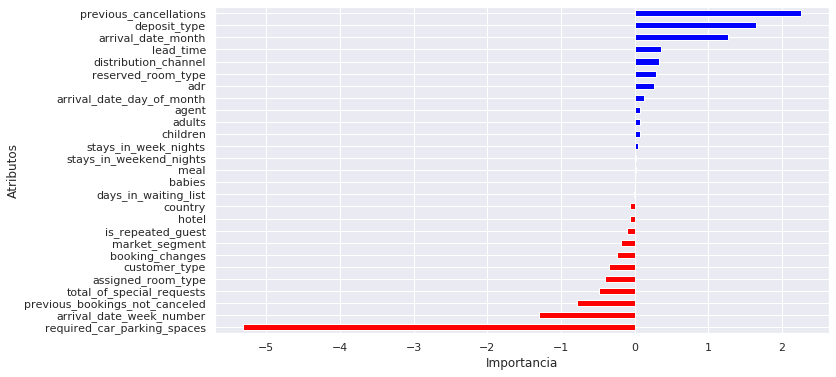

In [40]:
importancia.importancia.plot(kind='barh', figsize=(11, 6),color = importancia.positiva.map({True: 'blue', False: 'red'}))
plt.xlabel('Importancia');

In [41]:
coeficientes = list(Modelo_Reserva2.coef_[0])
etiquetas = list(atributosParaModelo2.columns)
importancia = pd.DataFrame()
importancia['Atributos'] = etiquetas
importancia['importancia'] = coeficientes
importancia.sort_values(by=['importancia'], ascending=True, inplace=True)
importancia['positiva'] = importancia['importancia'] > 0
importancia.set_index('Atributos', inplace=True)
importancia

,importancia,positiva
Atributos,,
required_car_parking_spaces,-5.693929,False
previous_bookings_not_canceled,-0.778655,False
total_of_special_requests,-0.479400,False
assigned_room_type,-0.414043,False
customer_type,-0.363812,False
booking_changes,-0.237227,False
arrival_date_week_number,-0.229763,False
market_segment,-0.177109,False
is_repeated_guest,-0.115461,False


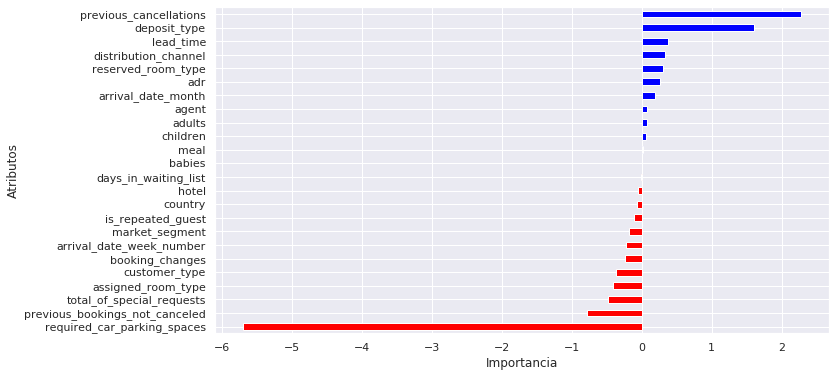

In [42]:
importancia.importancia.plot(kind='barh', figsize=(11, 6),color = importancia.positiva.map({True: 'blue', False: 'red'}))
plt.xlabel('Importancia');

### Algunas Conclusiones:

Al ver la importancia y el efetcto que tienen los atributos sobre el modelo, se observan relaciones que tienen sentido

- Se observa como los atributos deposit_type, arrival_date_month y previus_cancellations son los atributos que mas influyen en el momento en que una reserva es cancelada y eso tiene sentido
- Tambien se observa que los atributos que menos influencia tienen son reservation_status, required_car_parking_spaces y arrival_date_week_number y haciendo un analisis de lo que significan estos atributos, tiene sentido.

### Usando un Modelo de Arbol de Decisión

Usamos un algoritmo de árboles de decisión para realizar aprendizaje supervisado. En esta técnica, dividimos la población o muestra en dos o más conjuntos homogéneos (o subpoblaciones) basados en el más significativo divisor / diferenciador en los atributos de entrada.

In [43]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn import datasets
# import graficar_regiones_decision as grd


X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(atributosParaModelo, salidaParaModelo, 
                                                                        test_size = 0.1, 
                                                                        random_state=42)

X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(X_entrenamiento, y_entrenamiento, 
                                                                        test_size = 0.2, 
                                                                        random_state=43)

### Probando Árbol con el modelo 1 

In [44]:
# Usando atributosParaModelo1
arbol = DecisionTreeClassifier(criterion='gini', random_state=10)
arbol.fit(X_entrenamiento, y_entrenamiento)
print("Exactitud: {:.3f}".format(arbol.score(X_validacion, y_validacion)))

Exactitud: 0.851


In [45]:
# Usando atributosParaModelo1
arbol2 = DecisionTreeClassifier(criterion='entropy',random_state=10)
arbol2.fit(X_entrenamiento, y_entrenamiento)
print("Exactitud: {:.3f}".format(arbol2.score(X_validacion, y_validacion)))

Exactitud: 0.844


### Probando Árbol con el modelo 2 y con:
#### - La medida de impureza gini

In [46]:
# Usando atributosParaModelo2
arbol3 = DecisionTreeClassifier(criterion='gini',random_state=10)
arbol3.fit(X_entrenamiento2, y_entrenamiento2)
print("Exactitud: {:.3f}".format(arbol3.score(X_validacion2, y_validacion2)))

Exactitud: 0.850


In [47]:
# Usando atributosParaModelo2
arbol4 = DecisionTreeClassifier(criterion='entropy',random_state=10)
arbol4.fit(X_entrenamiento2, y_entrenamiento2)
print("Exactitud: {:.3f}".format(arbol4.score(X_validacion2, y_validacion2)))

Exactitud: 0.848


#### - Decrementando la medida de impureza gini

In [48]:
# Usando atributosParaModelo2
arbol5 = DecisionTreeClassifier(criterion='gini',random_state=10, min_impurity_decrease = 0.2)
arbol5.fit(X_entrenamiento2, y_entrenamiento2)
print("Exactitud: {:.3f}".format(arbol5.score(X_validacion2, y_validacion2)))

Exactitud: 0.630


In [49]:
# Usando atributosParaModelo2
arbol5 = DecisionTreeClassifier(criterion='gini',random_state=10, min_impurity_decrease = 0.1)
arbol5.fit(X_entrenamiento2, y_entrenamiento2)
print("Exactitud: {:.3f}".format(arbol5.score(X_validacion2, y_validacion2)))

Exactitud: 0.750


In [50]:
# Usando atributosParaModelo2
arbol5 = DecisionTreeClassifier(criterion='gini',random_state=10, min_impurity_decrease = 0.01)
arbol5.fit(X_entrenamiento2, y_entrenamiento2)
print("Exactitud: {:.3f}".format(arbol5.score(X_validacion2, y_validacion2)))

Exactitud: 0.764


In [51]:
# Usando atributosParaModelo2
arbol5 = DecisionTreeClassifier(criterion='gini',random_state=10, min_impurity_decrease = 0.001)
arbol5.fit(X_entrenamiento2, y_entrenamiento2)
print("Exactitud: {:.3f}".format(arbol5.score(X_validacion2, y_validacion2)))

Exactitud: 0.833


#### Conclusiones:
La mejor presición de este modelo la obtenemos al utilizar la medida de impureza gini en el modelo 1, el resultado fue una **Exactitud de : 0.851**

### Para ver el arbol decision

In [52]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


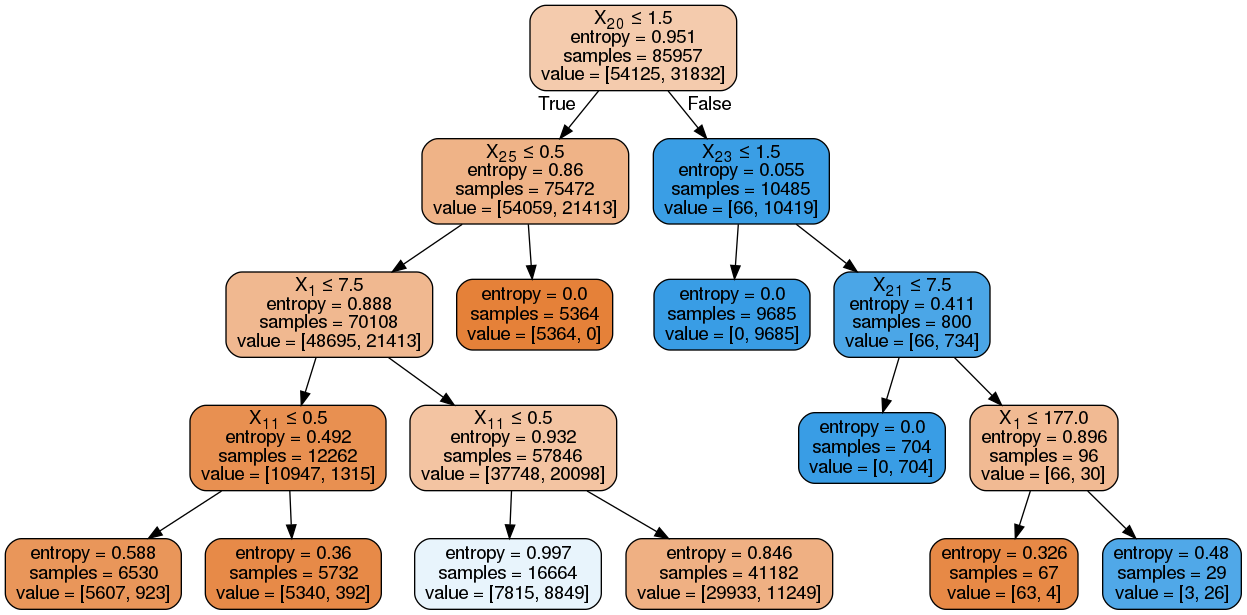

In [53]:
arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
arbol3.fit(X_entrenamiento, y_entrenamiento)
dot_data = StringIO()
export_graphviz(arbol3, out_file=dot_data,  
                 filled=True, rounded=True,
                 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Aplicando Gaussian Naive Bayes

Naive Bayes es un algoritmo que aprende la probabilidad de que un objeto con ciertos atributos pertenesca a un grupo o una clase en particular. En resumen, es un clasificador probabilístico.Este algoritmo esta basado en el teorema de probabilidad de Bayes. No sólo es conocido por su simplicidad, sino también por su eficacia. Es rápido construir modelos y hacer predicciones con el algoritmo Naive Bayes.

In [54]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(X_entrenamiento, y_entrenamiento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
naiveBayes.score(X_validacion, y_validacion)

0.57757096323871571

In [56]:
naiveBayes2 = GaussianNB()
naiveBayes2.fit(X_entrenamiento2, y_entrenamiento2)
y_predict2 = naiveBayes.predict(X_validacion)

In [57]:
naiveBayes2.score(X_validacion2, y_validacion2)

0.47989762680316428

In [58]:
from sklearn.metrics import confusion_matrix
print("\nMatriz de confusión:")
skcm = confusion_matrix(y_validacion2, y_predict2)
# colocar en un dataframe para imprimir las etiquetas
skcm = pd.DataFrame(skcm, columns=['predice-NoCanceled','predice-Canceled'])
skcm['actual'] = ['NoCanceled','Canceled']
skcm = skcm.set_index('actual')
print(skcm)


Matriz de confusión:
            predice-NoCanceled  predice-Canceled
actual                                          
NoCanceled                5556              7980
Canceled                  1098              6856


#### Conclusión del modelo Gaussian Naive Bayes: 
La presición de este modelo respecto a los demás disminuye considerablemente, por lo que podemos asegurar que no es un modelo muy adecuado para predecir el objetivo de nuestro proyecto.

# Conclusión:
Comparando el resultado para los diferentes modelos de predicción, tenemos que:

- El modelo simple de **Regresión Logistica** arrojo como resultado:
    - Exactitud con 1era Iteración =  79.3671475105 %
    - Exactitud con 2da Iteración = 79.53001396 %
    
    
- El Modelo de **Arbol de Decisión** arrojo como resultado:
    - Exactitud con Árbol con el modelo 1 (gini) = 85.1 %
    - Exactitud con Árbol con el modelo 1 (entropy) = 84.4 %
    - Exactitud con Árbol con el modelo 2 (gini) = 85.0 %
    - Exactitud con Árbol con el modelo 2 (entropy) = 84.8 %
    
    Decrementando la medida de impureza en 0.001:
    - Exactitud con Árbol con el modelo 2 (gini) = 83.3 %
    
    
- El Modelo de **Gaussian Naive Bayes** arrojo como resultado:
    - Exactitud = 47.9 %

Por lo que concluimos que el mejor modelo para la predicción de nuestro objetivo es el de **Arbol de Decisión** en el modelo 1 y con la medida de impureza gini, ya que nos da una exactitud de predicción del **85.1 %**